In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d lizwozsliz/data-raiden-shogun

 99% 1.72G/1.73G [00:21<00:00, 155MB/s]
100% 1.73G/1.73G [00:21<00:00, 87.9MB/s]


In [ ]:
!unzip -q data-raiden-shogun.zip -d dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming that '/content/dataset/Data raiden shogun' is the path to the unzipped dataset
train_dir = '/content/dataset/Data raiden shogun/train'
validation_dir = '/content/dataset/Data raiden shogun/validation'

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Change this if you need a different size
    batch_size=32,
    class_mode='binary')  # Use 'categorical' for multi-class classification

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),  # Change this if you need a different size
    batch_size=32,
    class_mode='binary')  # Use 'categorical' for multi-class classification

Found 606 images belonging to 2 classes.
Found 607 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

In [ ]:
model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
18/18 [==============================] - 138s 8s/step - loss: 0.8968 - accuracy: 0.8728 - val_loss: 0.4080 - val_accuracy: 0.8733
Epoch 2/10
18/18 [==============================] - 133s 7s/step - loss: 0.3583 - accuracy: 0.8763 - val_loss: 0.2166 - val_accuracy: 0.8802
Epoch 3/10
18/18 [==============================] - 170s 10s/step - loss: 0.2121 - accuracy: 0.8850 - val_loss: 0.1708 - val_accuracy: 0.8854
Epoch 4/10
18/18 [==============================] - 170s 10s/step - loss: 0.1255 - accuracy: 0.9495 - val_loss: 0.1234 - val_accuracy: 0.9497
Epoch 5/10
18/18 [==============================] - 168s 10s/step - loss: 0.2483 - accuracy: 0.9024 - val_loss: 0.1608 - val_accuracy: 0.8802
Epoch 6/10
18/18 [==============================] - 133s 7s/step - loss: 0.1530 - accuracy: 0.8868 - val_loss: 0.1233 - val_accuracy: 0.9201
Epoch 7/10
18/18 [==============================] - 175s 10s/step - loss: 0.1116 - accuracy: 0.9321 - val_loss: 0.0756 - val_accuracy: 0.9670
Epoch 8/1

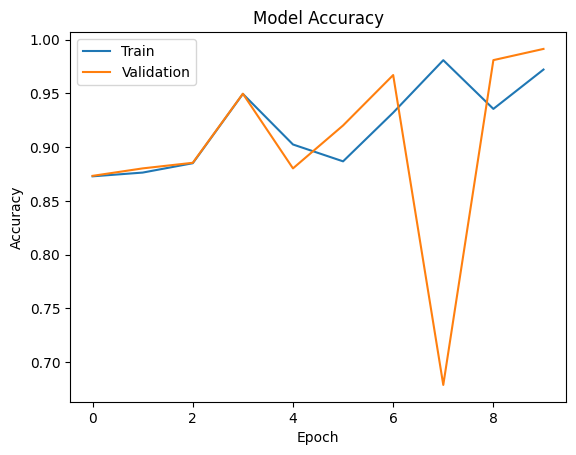

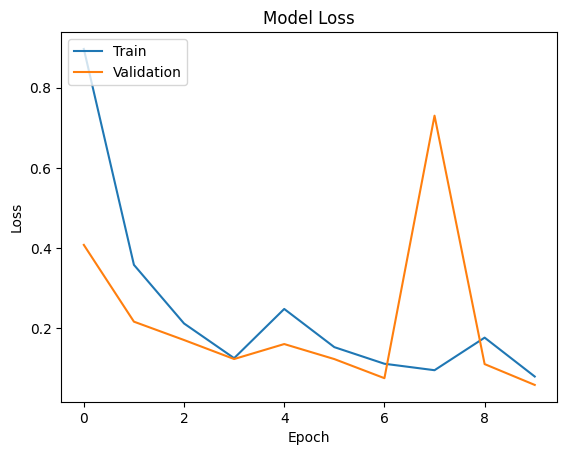

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save('/content/raiden_shogun_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Replace with the path to your saved model and image file
model_path = '/content/raiden_shogun_model.h5'
image_path = '/content/113329165_p0_master1200.jpg'

# Load the trained model
model = load_model(model_path)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Replace with the input size of your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Model expects images in batches, so we add a batch dimension
img_array /= 255.0  # Assuming you normalized training images

# Make a prediction
prediction = model.predict(img_array)
print(prediction)


predicted_class = 'human_created' if prediction[0][0] > 0.5 else 'ai_generated'
print(predicted_class)

1/1 [==============================] - 0s 119ms/step
[[0.16516756]]
ai_generated


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

# Load your trained model
model = load_model('/content/raiden_shogun_model.h5')

# Directory with your test images
test_dir = '/content/dataset/Data raiden shogun/test'
test_images = os.listdir(test_dir)

# Preprocess all test images
test_imgs = []
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(224, 224))  # Replace with the input size of your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    test_imgs.append(img_array)

# Run predictions
predictions = [model.predict(img) for img in test_imgs]

# Visualize results
plt.figure(figsize=(20, 10))
for i, (img_array, prediction) in enumerate(zip(test_imgs, predictions)):
    plt.subplot(2, 5, i + 1)  # Adjust depending on the number of images
    plt.imshow(np.squeeze(img_array))
    plt.title(f'AI-Generated: {prediction[0][0]:.2%}\nHuman-Created: {1 - prediction[0][0]:.2%}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1/1 [==============================] - 0s 55ms/step


ValueError: ignored

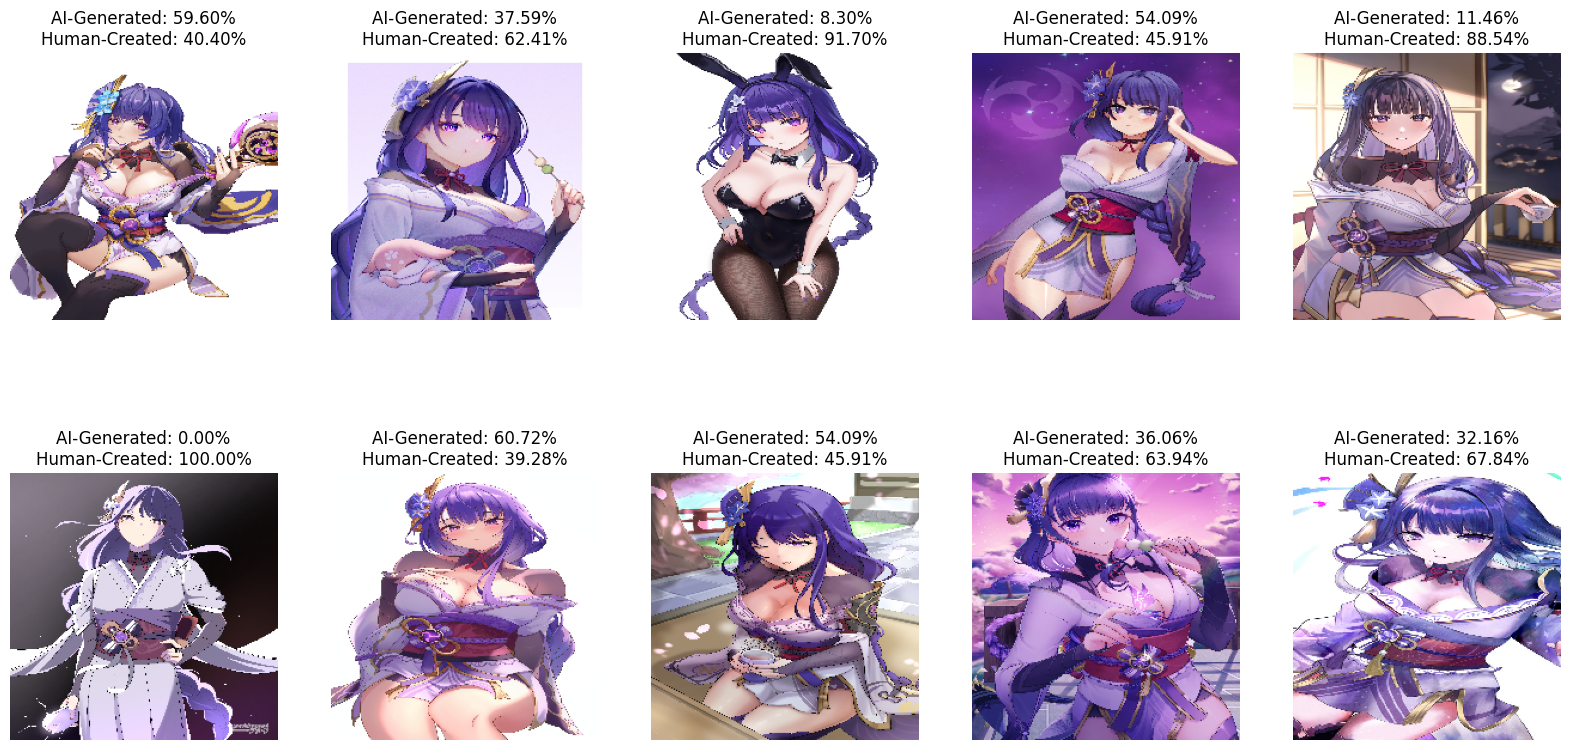

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

# Load your trained model
model = load_model('/content/raiden_shogun_model.h5')

# Directory with your test images
test_dir = '/content/dataset/Data raiden shogun/test'
test_images = os.listdir(test_dir)

# Preprocess all test images
test_imgs = []
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(224, 224))  # Replace with the input size of your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    test_imgs.append(img_array)

# Run predictions
predictions = [model.predict(img) for img in test_imgs]

# Visualize results
plt.figure(figsize=(20, 10))
for i, (img_array, prediction) in enumerate(zip(test_imgs, predictions)):
    plt.subplot(2, 5, i + 1)  # Adjust depending on the number of images
    plt.imshow(np.squeeze(img_array))
    plt.title(f'AI-Generated: {prediction[0][0]:.2%}\nHuman-Created: {1 - prediction[0][0]:.2%}')
    plt.axis('off')
plt.tight_layout()
plt.show()